# CodeClause
##  Data Science Intern
## Author : Vinay Sunil Khatate
## Project Name
## Task-1 :Churn Prediction in Telecom Industry using Logistic Regression


## Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
ch= pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive (7)\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs

In [3]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
ch.shape

(7043, 21)

In [5]:
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
ch.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
ch['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
ch['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
ch['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [10]:
ch['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [11]:
ch['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [12]:
ch['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [13]:
ch['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
ch['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [15]:
ch['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [16]:
ch['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [17]:
ch['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [18]:
ch['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [19]:
ch['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [20]:
ch['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
ch['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
ch['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [23]:
ch['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
ch['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [25]:
ch['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [26]:
ch['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [27]:
ch['TotalCharges'].dtypes

dtype('O')

In [28]:
columns = ch.columns[1:]

In [29]:
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
ch['TotalCharges']=pd.to_numeric(ch['TotalCharges'], errors='coerce')

In [31]:
cat_col=ch[columns].select_dtypes(include='object').columns.to_list()

In [32]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

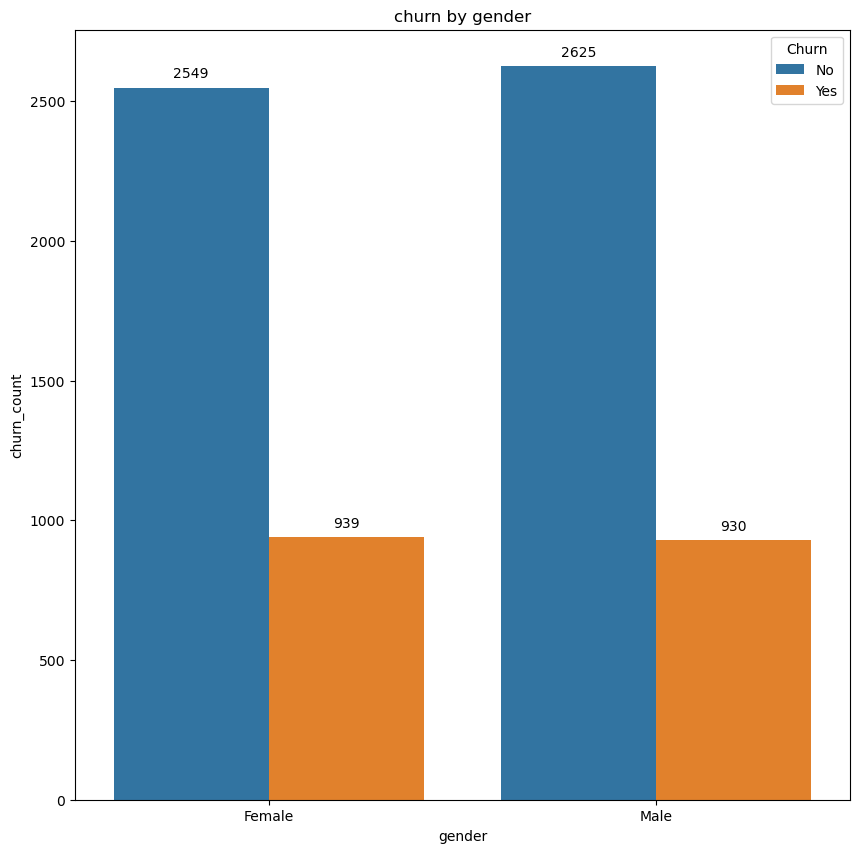

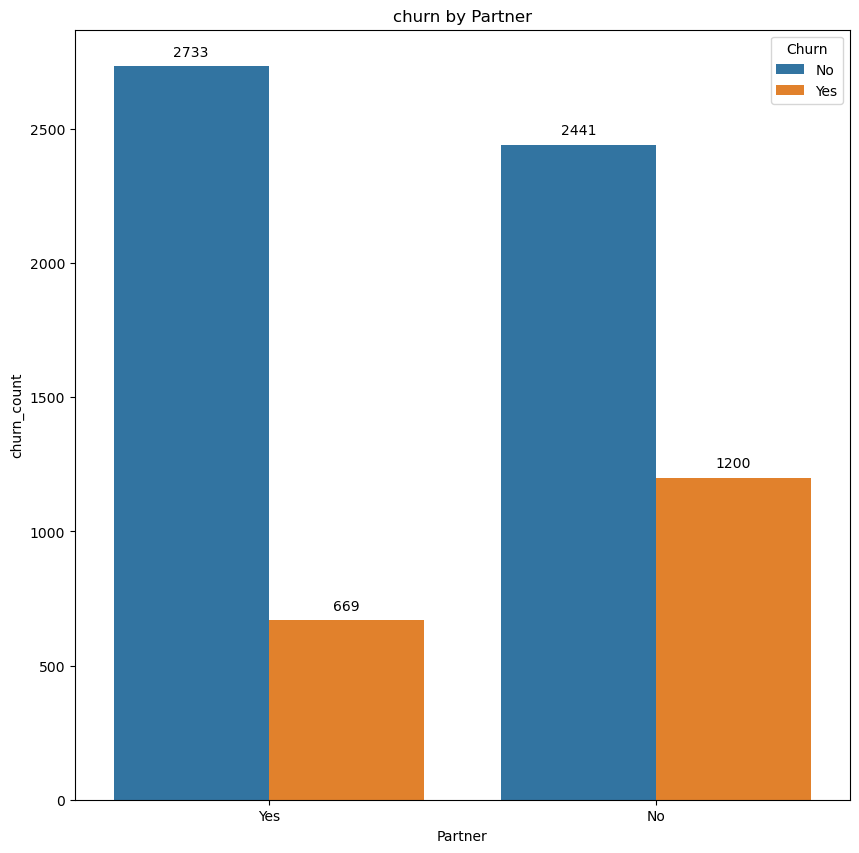

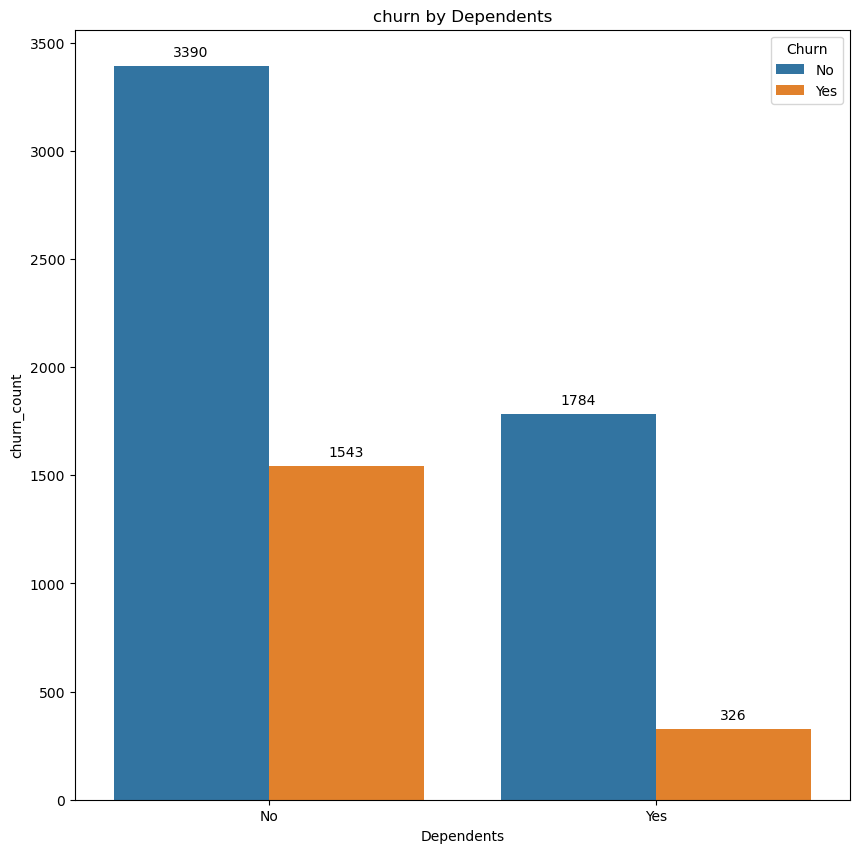

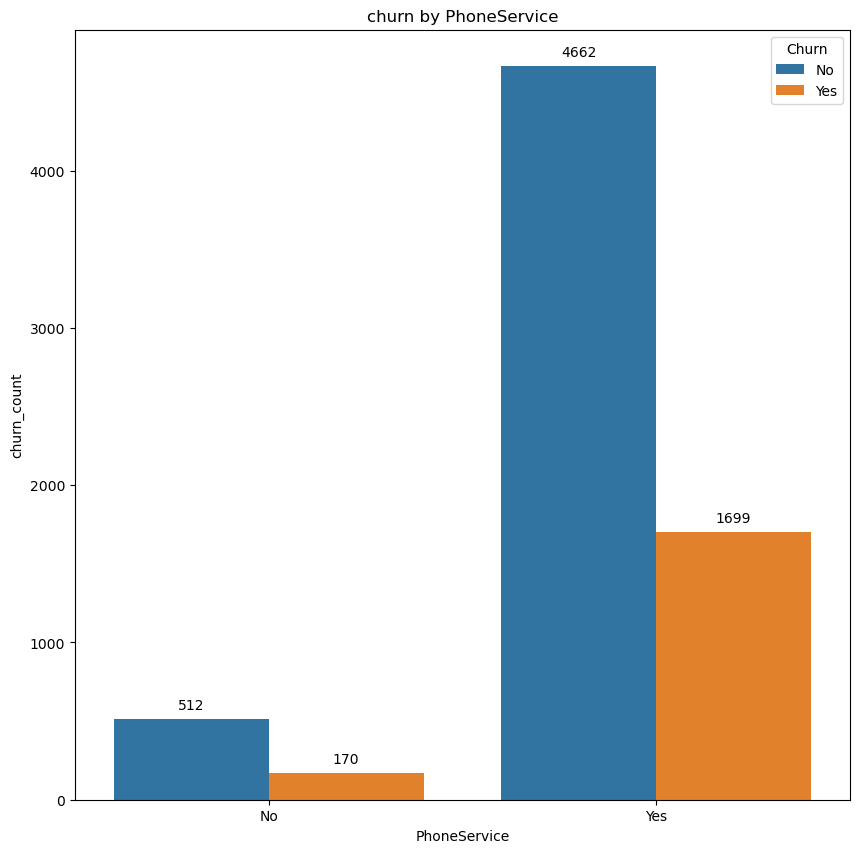

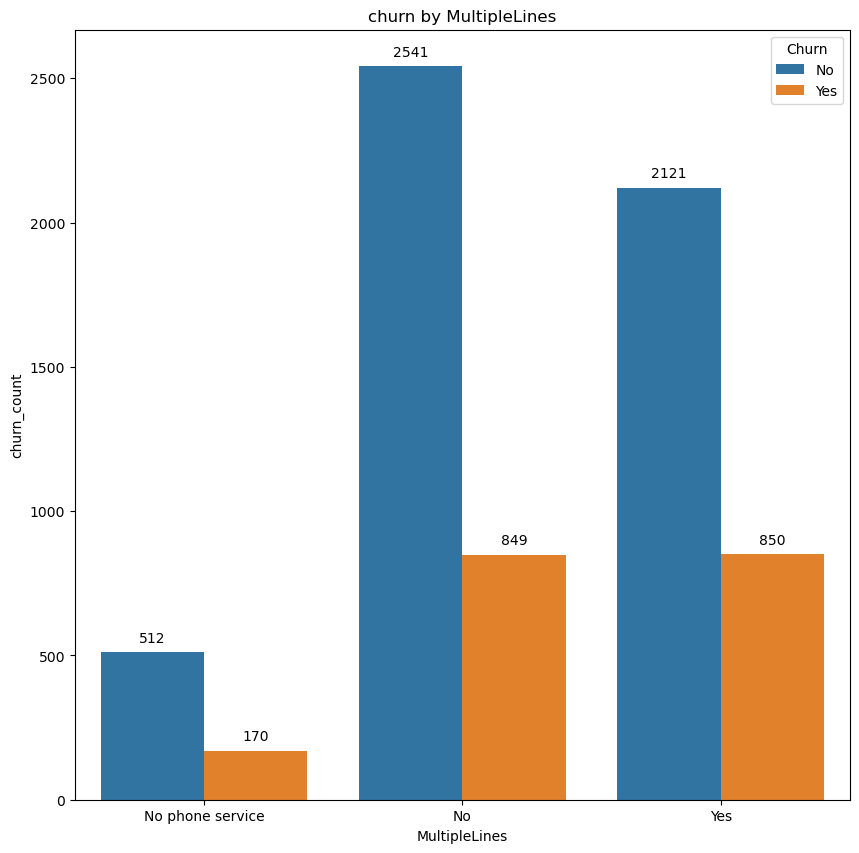

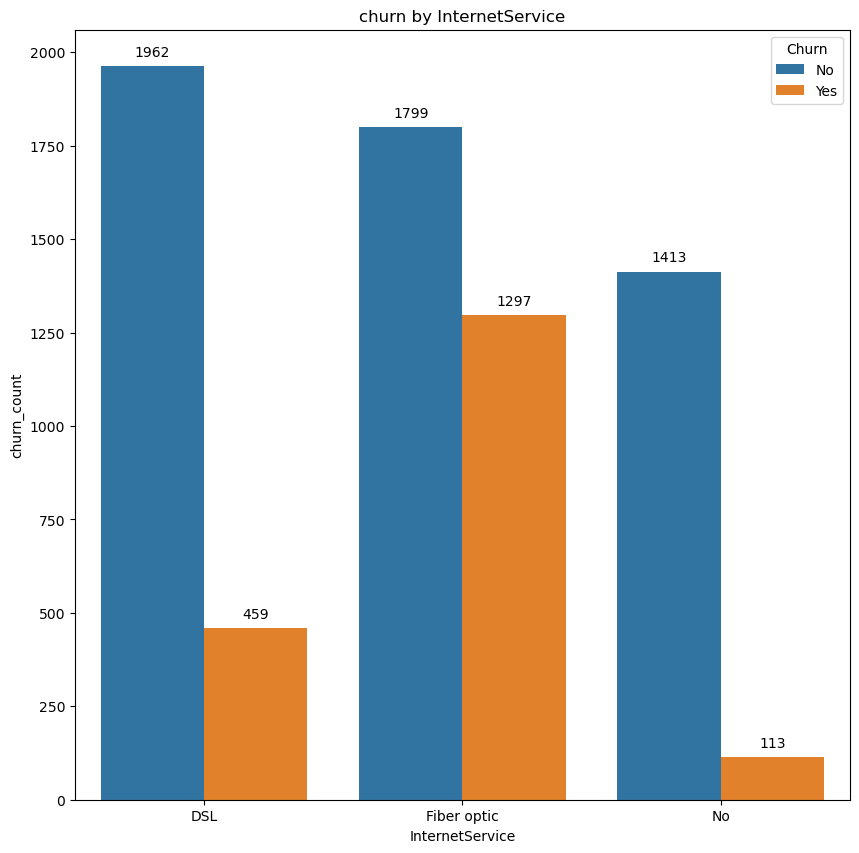

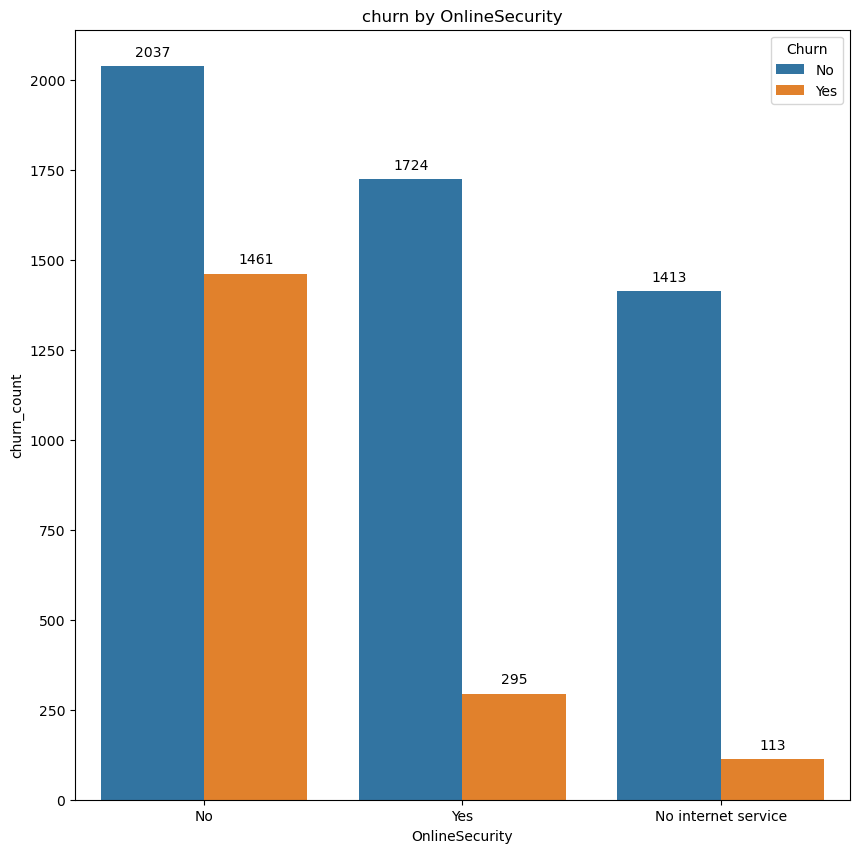

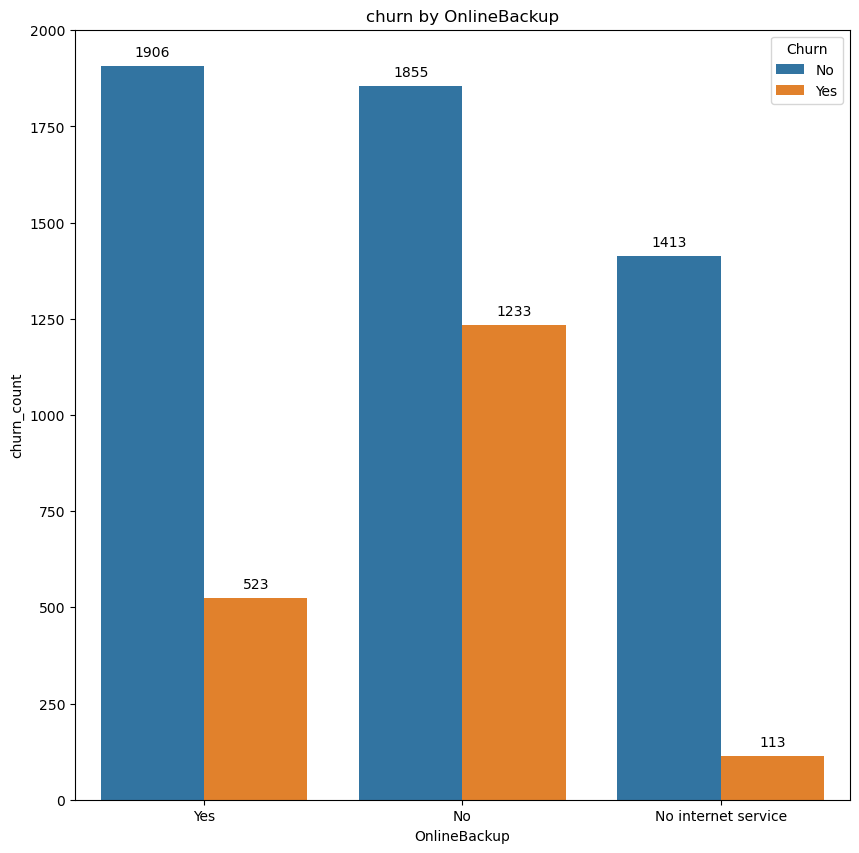

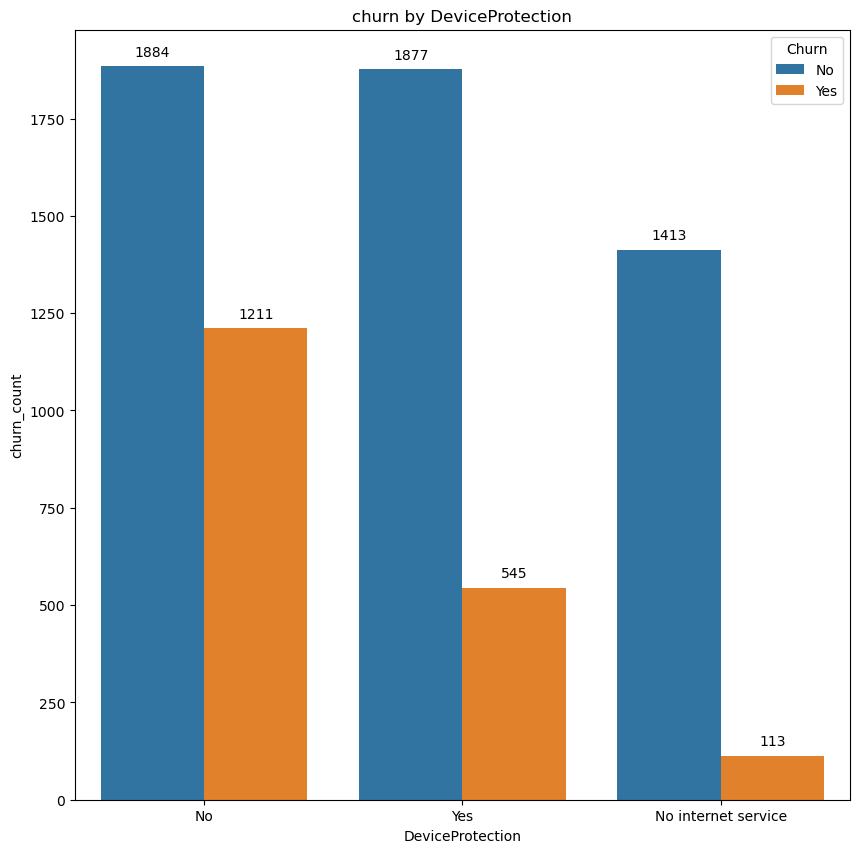

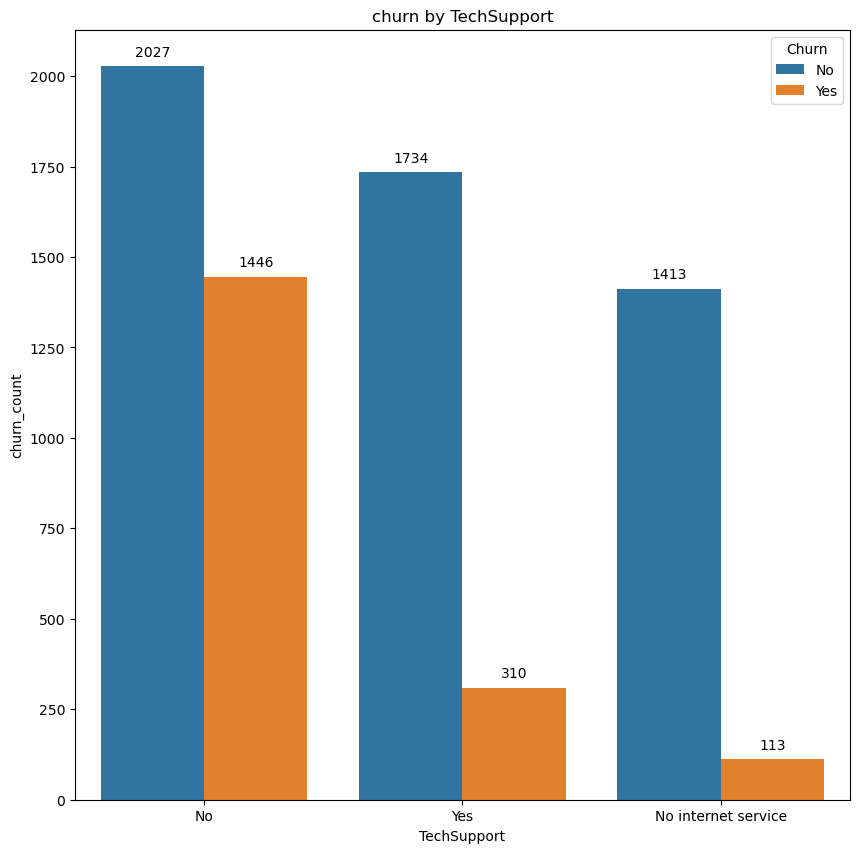

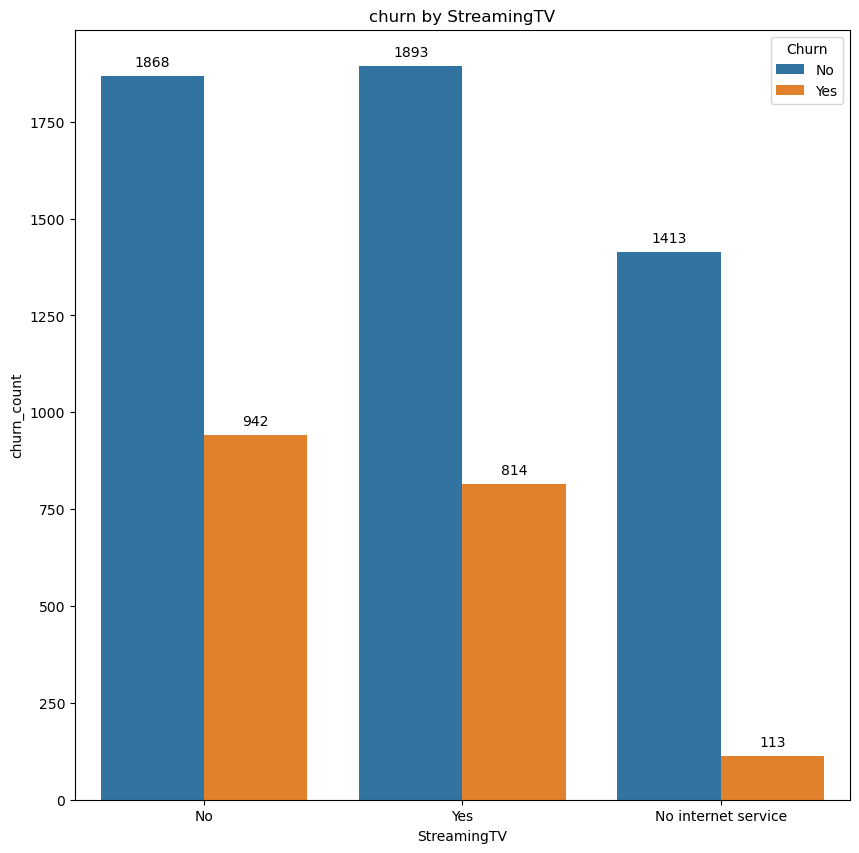

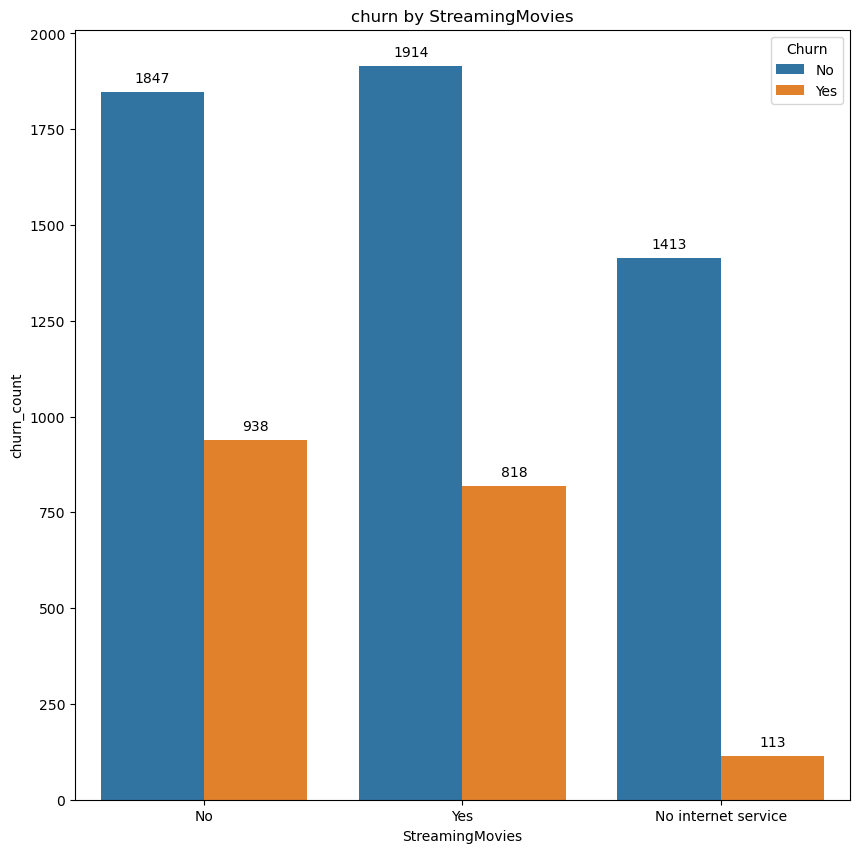

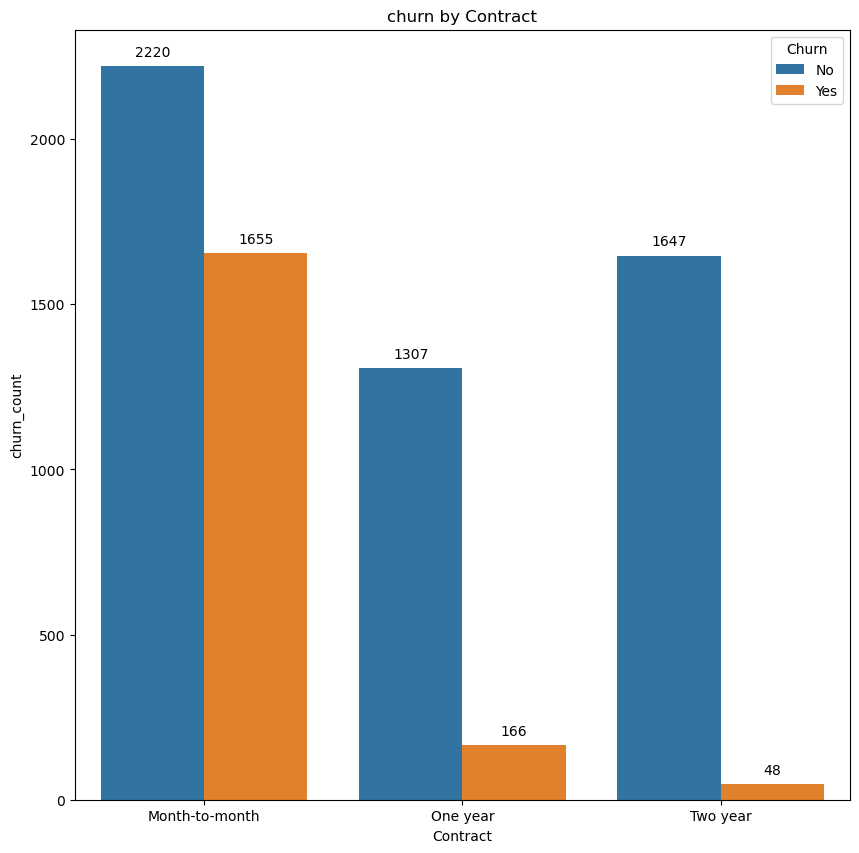

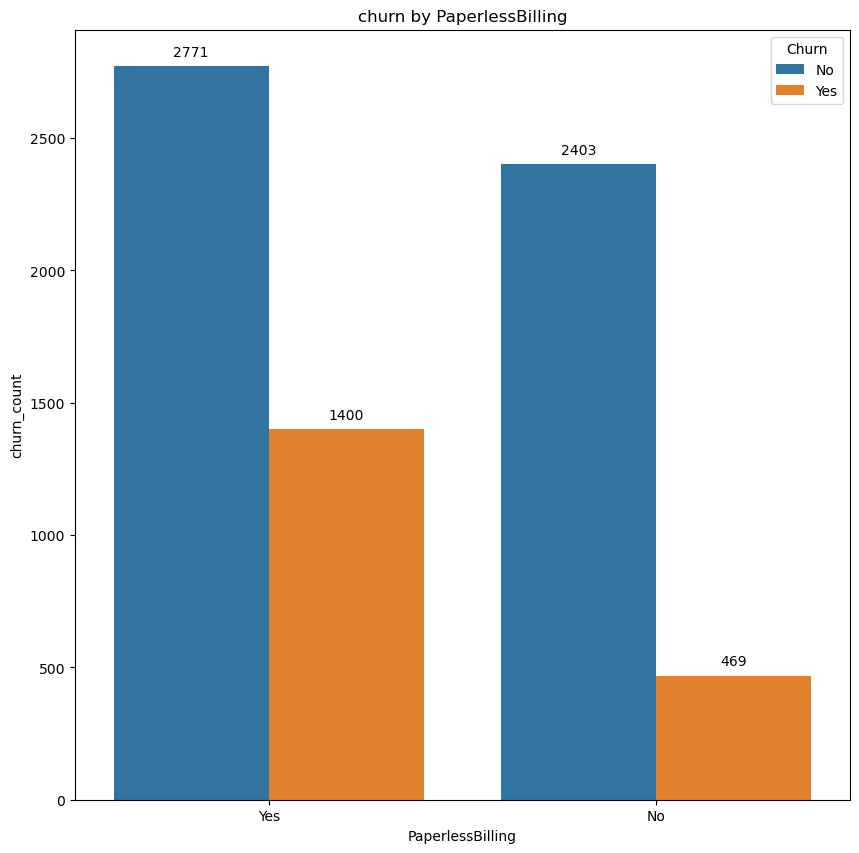

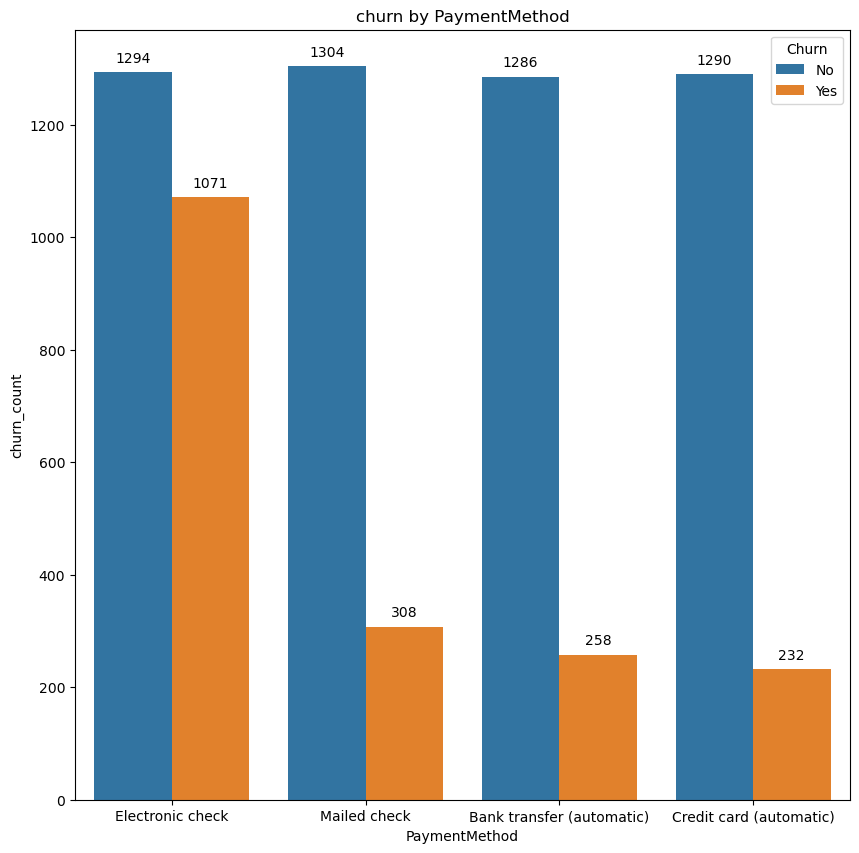

In [33]:
def churn_by(column_name,data):
    plt.figure(figsize=(10,10))
    plt.subplot
    ax = sns.countplot(x=column_name,hue='Churn',data=data)
    plt.title(f'churn by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('churn_count')

    # Add exact value to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()
# reapeating for every variable 
for column in cat_col[:-1]:
    churn_by(column,ch)

The majortity of customers are not senior citizens.

Customers who has Internet service more likely to churn.

Month-to-month contract, using Electronic check, not using Online serves customers, the churn rate is higher.

1 - 2 year contract having lower churn rate.

As long as customer do not pay with electronic checks, customer churn rates drop.

# Tenure group
Bucketing the 'tenure' variable into different groups (e.g., '0-12 months', '13-24 months', '25-48 months', '49-60 months', '> 60 months').

This can help reveal patterns related to customer loyalty and the likelihood of churn based on the length of their relationship with the company.

# TotalCharges to MonthlyCharges Ratio
This can help determine if there is any relationship between the cumulative amount a customer has paid and their monthly charges, which could affect their likelihood to churn.

# Combine Services
Identify patterns in customer preferences for bundled services and their impact on churn.

# Total Services
Identify if customers with more services are less likely to churn

# Old TechSupport?
whether a customer is a senior citizen with tech support or a non-senior citizen with tech support, would they churn?

In [34]:
Processing_data =ch.copy()

In [35]:
#Create a new categorical feature called 'TenureGroup' by bucketing the 'tenure' variable into different groups (e.g., '0-12 months', '13-24 months', '25-36 months', '37-48 months', '47-60 months', > 60 months).
Processing_data['TenureGroup'] = pd.cut(Processing_data['tenure'], bins=[-1,12,24,36,48,60,72], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '> 5 Years'])
#Create new binary features indicating whether the customer has specific combinations of services, such as 'PhoneAndInternet'
Processing_data['PhoneAndInternet'] = (Processing_data['PhoneService'] == 'Yes') & (Processing_data['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'TechSupportAndInternet'
Processing_data['TechSupportANDInternet'] = (Processing_data['TechSupport'] == 'Yes') & (Processing_data['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'SecurityAndInternet'
Processing_data['SecurityANDInternet'] = (Processing_data['OnlineSecurity'] == 'Yes') & (Processing_data['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'BackupAndInternet'
Processing_data['BackupANDInternet'] = (Processing_data['OnlineBackup'] == 'Yes') & (Processing_data['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'DeviceProtectionAndInternet'
Processing_data['DeviceProtectionANDInternet'] = (Processing_data['DeviceProtection'] == 'Yes') & (Processing_data['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'StreamingTV,StramingMoviesAndInternet'
Processing_data['StreamingTV_StramingMoviesANDInternet'] = (Processing_data['StreamingTV'] == 'Yes') & (Processing_data['StreamingMovies'] == 'Yes') & (Processing_data['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'BackupAndInternet'
Processing_data['BackupANDInternet'] = (Processing_data['OnlineBackup'] == 'Yes') & (Processing_data['InternetService'] != 'No')


In [36]:
#Create a new feature called 'TotalServices' that counts the number of services a customer has subscribed to (e.g., phone, internet, online security, online backup, device protection, tech support, streaming TV, and streaming movies).
Processing_data['TotalServices'] = Processing_data[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).sum(axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1140\1416031540.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Processing_data['TotalServices'] = Processing_data[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).sum(axis=1)


In [37]:
#Create a feature indicating whether a customer is a senior citizen with tech support or a non-senior citizen with tech support.
Processing_data['SeniorCitizenWithTechSupport'] = (Processing_data['SeniorCitizen'] == 1) & (Processing_data['TechSupport'] == 'Yes')

In [38]:
Processing_data.isnull().sum()

customerID                                0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
InternetService                           0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                             0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
TenureGroup                               0
PhoneAndInternet                

In [39]:
#Fill in missing values for 'TotalCharges' with the main
Processing_data['TotalCharges'] = Processing_data['TotalCharges'].fillna(Processing_data['TotalCharges'].mean())

In [40]:
Processing_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,TenureGroup,PhoneAndInternet,TechSupportANDInternet,SecurityANDInternet,BackupANDInternet,DeviceProtectionANDInternet,StreamingTV_StramingMoviesANDInternet,TotalServices,SeniorCitizenWithTechSupport
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,0-1 Year,False,False,False,True,False,False,1,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,2-3 Years,True,False,True,False,True,False,3,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,0-1 Year,True,False,True,True,False,False,3,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,3-4 Years,False,True,True,False,True,False,3,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,0-1 Year,True,False,False,False,False,False,1,False


Text(0.5, 1.0, 'Tenure_group_churn')

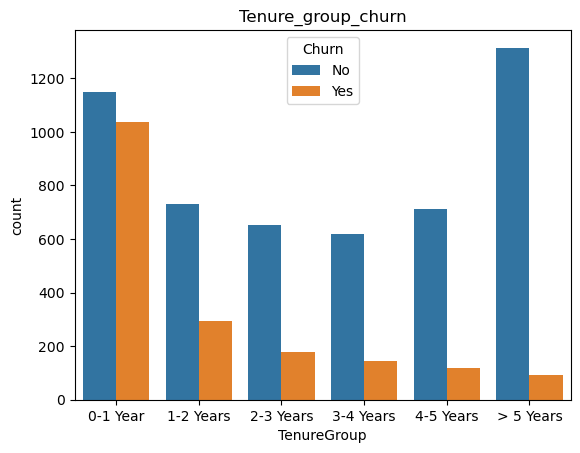

In [41]:
Tenure_group_churn = sns.countplot(x=Processing_data['TenureGroup'],hue=Processing_data['Churn'])
plt.title('Tenure_group_churn')

Text(0.5, 1.0, 'TechSupportANDInternet_Churn')

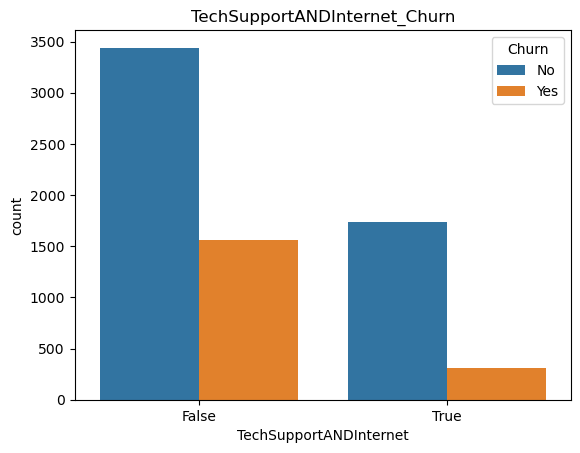

In [42]:
TechSupportANDInternet_Churn = sns.countplot(x=Processing_data['TechSupportANDInternet'],hue=Processing_data['Churn'])
plt.title('TechSupportANDInternet_Churn')

0-1 year customers seem to be more likely to churn.

Text(0.5, 1.0, 'SecurityANDInternet_Churn')

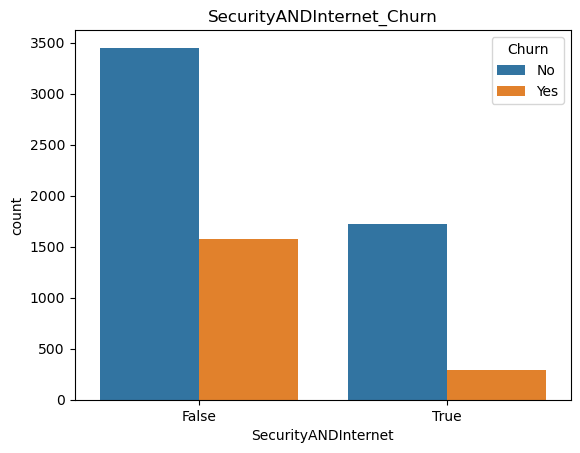

In [43]:
SecurityANDInternet_Churn = sns.countplot(x=Processing_data['SecurityANDInternet'],hue=Processing_data['Churn'])
plt.title('SecurityANDInternet_Churn')

Text(0.5, 1.0, 'BackupANDInternet_Churn')

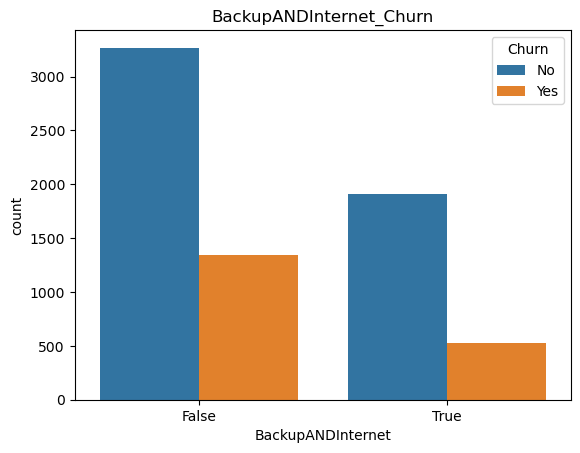

In [44]:
BackupANDInternet_Churn = sns.countplot(x=Processing_data['BackupANDInternet'],hue=Processing_data['Churn'])
plt.title('BackupANDInternet_Churn')

Text(0.5, 1.0, 'StreamingTV_StramingMoviesANDInternet_Churn')

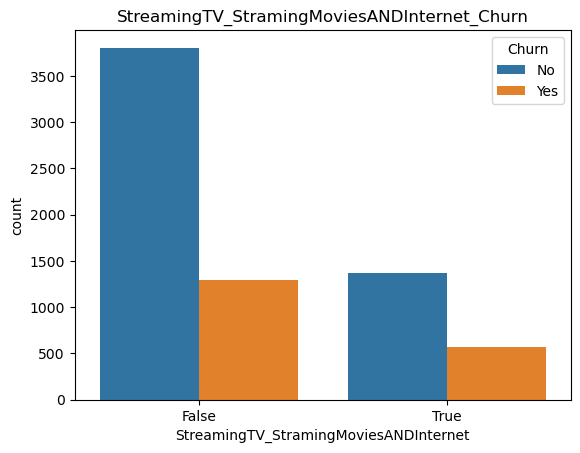

In [45]:
StreamingTV_StramingMoviesANDInternet_Churn = sns.countplot(x=Processing_data['StreamingTV_StramingMoviesANDInternet'],hue=Processing_data['Churn'])
plt.title('StreamingTV_StramingMoviesANDInternet_Churn')

Text(0.5, 1.0, 'TotalServices_Churn')

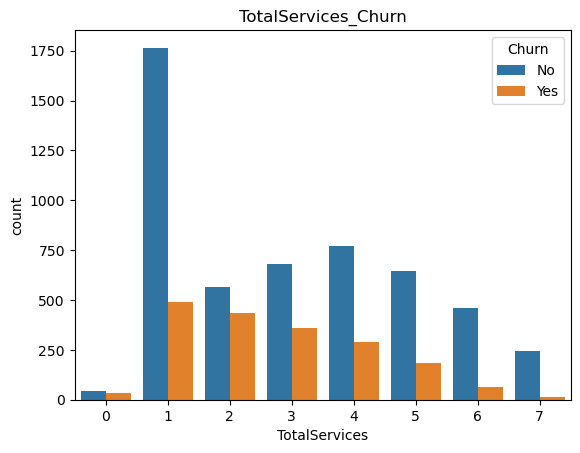

In [46]:
TotalServices_Churn = sns.countplot(x=Processing_data['TotalServices'],hue=Processing_data['Churn'])
plt.title('TotalServices_Churn')

Those customers who have Internet service and have TechSupport or Security or Backup service, they have lower churn rate.

The more Total Services there are, the lower the churn rate will be.
### Higher churn rate for customers who have Streaming Services and Internet Services at the same time



In [47]:
train_data = Processing_data.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Iterate through binary categorical columns and apply label encoding
binary_categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

for col in binary_categorical_columns:
    train_data[col] = encoder.fit_transform(train_data[col])

In [49]:
# Iterate through multi-category nominal columns and apply one-hot encoding
multi_category_columns = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod', 'TenureGroup'
]

# Apply one-hot encoding and concatenate with the original dataframe
train_data = pd.get_dummies(train_data, columns=multi_category_columns, drop_first=True)

In [50]:
train_data.drop('customerID', axis=1, inplace=True)


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  PhoneAndInternet                       7043 non-null   bool   
 11  Tech

In [52]:
train_data['PaymentMethod_Mailed check'].value_counts()

0    5431
1    1612
Name: PaymentMethod_Mailed check, dtype: int64

In [56]:
y = train_data['Churn'].values
X = train_data.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [57]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [59]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8069096071935636


AxesSubplot(0.125,0.11;0.775x0.77)


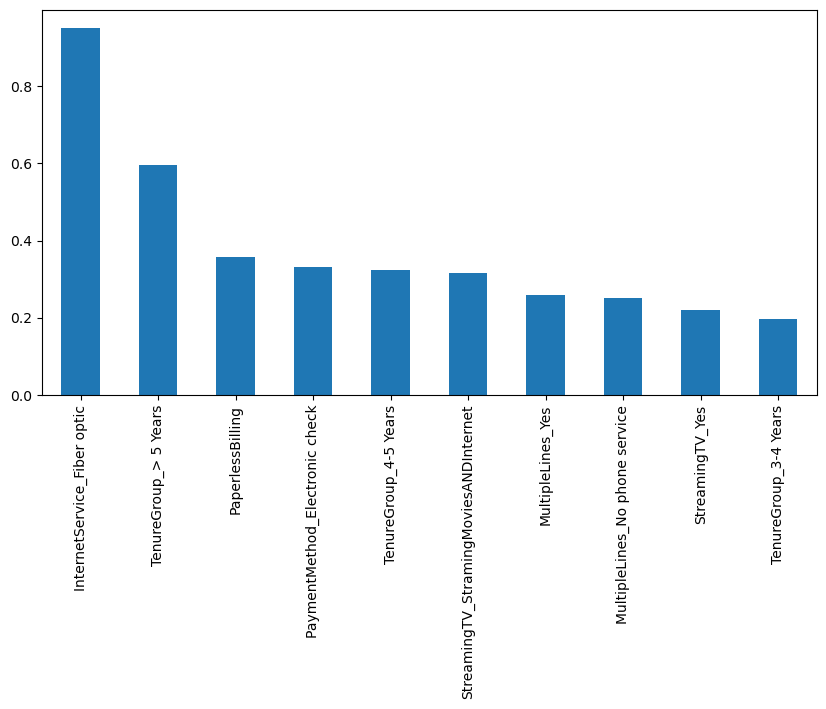

In [68]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
plt.figure(figsize=(10,5))
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


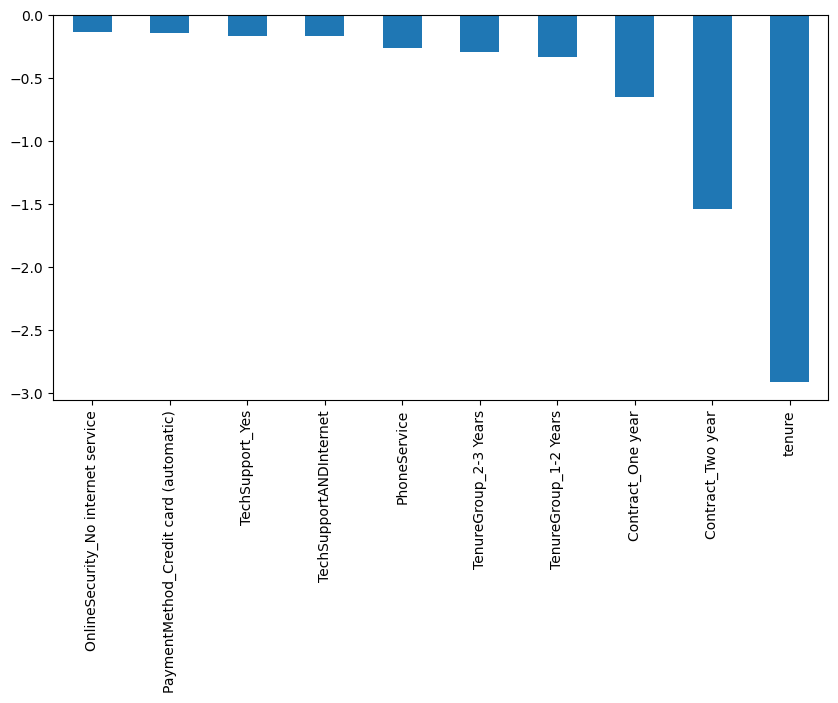

In [69]:
plt.figure(figsize=(10,5))
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

# Observtions
We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions

Having DSL internet service also reduces the proability of Churn

Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

Any hypothesis on the above would be really helpful!